In [19]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy import stats
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress

pd.set_option('display.max_rows', 800)

pd.set_option('display.max_columns', None)

In [20]:
#Read in data
Factbook_df = pd.read_csv('../Blue-Barracudas-group-2-/Resources/Factbookdata.csv')
Happy_df = pd.read_csv('../Blue-Barracudas-group-2-/Resources/cleanAndHappy.csv', index_col = 0)


Happy_df['Country']

0                   Switzerland
1                       Iceland
2                       Denmark
3                        Norway
4                        Canada
5                       Finland
6                   Netherlands
7                        Sweden
8                   New Zealand
9                     Australia
10                       Israel
11                   Costa Rica
12                      Austria
13                       Mexico
14                United States
15                       Brazil
16                   Luxembourg
17                      Ireland
18                      Belgium
19         United Arab Emirates
20               United Kingdom
21                         Oman
22                    Venezuela
23                    Singapore
24                       Panama
25                      Germany
26                        Chile
27                        Qatar
28                       France
29                    Argentina
30               Czech Republic
31      

In [21]:
Factbook_df.head()

,Country,literacy,schoolyears,internetpercent,electricpercent,governmenttype,pppPc,grosssavings,unemployment,belowpoverty,cleanwateraccess,sanitationaccess,obesityrate,underweightchildren,netmigrationrate,sexratioM2F,lifeexpentancy,fertilityrate,dependencyratio,median_age,latitude,longitude,NSHemi,EWHemi,coastline,borders,coastpercent,forestpercent,elevations
0,world,86.2,12.0,43.0,83.0,NaN,17500.0,27.9,7.7,NaN,91.1,67.7,NaN,NaN,NaN,1.01,69.8,2.42,52.5,30.6,NaN,NaN,NaN,NaN,356000.0,NaN,NaN,NaN,840.0
1,afghanistan,38.2,10.0,10.6,84.1,presidential Islamic republic,2000.0,22.7,23.9,54.5,55.3,31.9,5.5,25.0,-0.6,1.03,52.1,5.02,88.8,19.0,33.0,65.0,N,E,0.0,5987.0,0.000000,2.07,1884.0
2,akrotiri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,32.0,N,E,56.3,48.0,0.539789,NaN,NaN
3,albania,97.6,15.0,66.4,100.0,parliamentary republic,12500.0,15.9,13.8,14.3,83.6,93.2,21.7,1.5,-3.3,0.98,78.6,1.52,44.0,33.4,41.0,20.0,N,E,362.0,691.0,0.343780,28.12,708.0
4,algeria,80.2,14.0,42.9,99.4,presidential republic,15200.0,37.8,11.7,23.0,83.6,87.6,27.4,3.0,-0.9,1.03,77.2,2.66,52.7,28.3,28.0,3.0,N,E,998.0,6734.0,0.129074,0.80,800.0


In [105]:
#Reformat country names before merging.
#Change _ to " " to match with Happy_df
Factbook_df['Country'] = Factbook_df['Country'].str.replace("_"," ")
Factbook_df.head(100)

,Country,literacy,schoolyears,internetpercent,electricpercent,governmenttype,pppPc,grosssavings,unemployment,belowpoverty,cleanwateraccess,sanitationaccess,obesityrate,underweightchildren,netmigrationrate,sexratioM2F,lifeexpentancy,fertilityrate,dependencyratio,median_age,latitude,longitude,NSHemi,EWHemi,coastline,borders,coastpercent,forestpercent,elevations
0,world,86.2,12.0,43.0,83.0,NaN,17500.0,27.9,7.7,NaN,91.1,67.7,NaN,NaN,NaN,1.01,69.80,2.42,52.5,30.6,NaN,NaN,NaN,NaN,356000.0,NaN,NaN,NaN,840.0
1,afghanistan,38.2,10.0,10.6,84.1,presidential Islamic republic,2000.0,22.7,23.9,54.5,55.3,31.9,5.5,25.0,-0.6,1.03,52.10,5.02,88.8,19.0,33.0,65.0,N,E,0.0,5987.00,0.000000,2.07,1884.0
2,akrotiri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,32.0,N,E,56.3,48.00,0.539789,NaN,NaN
3,albania,97.6,15.0,66.4,100.0,parliamentary republic,12500.0,15.9,13.8,14.3,83.6,93.2,21.7,1.5,-3.3,0.98,78.60,1.52,44.0,33.4,41.0,20.0,N,E,362.0,691.00,0.343780,28.12,708.0
4,algeria,80.2,14.0,42.9,99.4,presidential republic,15200.0,37.8,11.7,23.0,83.6,87.6,27.4,3.0,-0.9,1.03,77.20,2.66,52.7,28.3,28.0,3.0,N,E,998.0,6734.00,0.129074,0.80,800.0
5,american samoa,NaN,NaN,31.3,59.0,presidential democracy; a self-governing terri...,11200.0,NaN,29.8,NaN,100.0,62.5,NaN,NaN,-26.6,1.00,73.90,2.57,NaN,26.1,14.0,170.0,S,W,116.0,0.00,1.000000,78.10,NaN
6,andorra,100.0,NaN,97.9,100.0,parliamentary democracy (since March 1993) tha...,49900.0,NaN,3.7,NaN,100.0,100.0,25.6,NaN,0.0,1.06,82.90,1.41,NaN,44.9,42.0,1.0,N,E,0.0,118.00,0.000000,34.00,1996.0
7,angola,71.1,10.0,13.0,40.5,presidential republic,6800.0,28.6,6.6,36.6,49.0,51.6,8.2,19.0,0.1,0.95,60.60,6.09,97.6,15.9,12.0,18.0,S,E,1600.0,5369.00,0.229588,46.30,1112.0
8,anguilla,NaN,NaN,81.6,NaN,parliamentary democracy (House of Assembly); s...,12200.0,NaN,8.0,23.0,94.6,97.9,NaN,NaN,11.5,0.90,81.60,1.74,NaN,35.1,18.0,63.0,N,W,61.0,0.00,1.000000,61.10,NaN
9,antarctica,NaN,NaN,100.0,NaN,Antarctic Treaty Summary - the Antarctic regio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,0.0,S,E,17968.0,NaN,NaN,NaN,2300.0


In [23]:
#Change to all lowercase to match Factbook_df
Happy_df.Country = Happy_df.Country.str.lower()
Happy_df.head()

,Overall Rank,Country,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Year
0,1,switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,2,iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,3,denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,4,norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,5,canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [24]:
#Create GB on country to get mean over all years
Happy_dfgb = Happy_df.groupby('Country')
Happydfgb =  Happy_dfgb.mean().reset_index(drop = False)
Happydfgb

,Country,Overall Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Year
0,afghanistan,148.250000,3.590250,0.358892,0.382941,0.228134,0.147405,0.295163,0.066367,2016.500000
1,albania,106.250000,4.711000,0.936541,0.731664,0.766120,0.369122,0.165358,0.047251,2016.500000
2,algeria,60.750000,5.781750,1.015704,1.052757,0.635071,0.201546,0.068274,0.154124,2016.500000
3,angola,140.000000,3.872250,0.798380,0.938368,0.133902,0.027433,0.105269,0.071570,2016.500000
4,argentina,27.250000,6.552750,1.115794,1.305700,0.730869,0.484275,0.098964,0.067885,2016.500000
5,armenia,124.500000,4.351750,0.836417,0.849841,0.668564,0.199286,0.079242,0.032459,2016.500000
6,australia,9.750000,7.288250,1.400606,1.374258,0.884162,0.617054,0.437097,0.320716,2016.500000
7,austria,12.500000,7.116000,1.403927,1.336204,0.850600,0.588162,0.304501,0.211325,2016.500000
8,azerbaijan,83.250000,5.234500,1.081305,1.002938,0.582316,0.387931,0.052665,0.174194,2016.500000
9,bahrain,43.750000,6.092500,1.397603,1.212330,0.688813,0.514854,0.190190,0.235941,2016.500000


In [25]:
#Merge factbook data with anual average happiness ratings
merge_df = pd.merge(Happydfgb,Factbook_df, on='Country', how='inner' ) 
merge_df.head(15)
merge_df = merge_df.sort_values("Overall Rank")
merge_df.head()


,Country,Overall Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Year,literacy,schoolyears,internetpercent,electricpercent,governmenttype,pppPc,grosssavings,unemployment,belowpoverty,cleanwateraccess,sanitationaccess,obesityrate,underweightchildren,netmigrationrate,sexratioM2F,lifeexpentancy,fertilityrate,dependencyratio,median_age,latitude,longitude,NSHemi,EWHemi,coastline,borders,coastpercent,forestpercent,elevations
35,denmark,2.25,7.53250,1.400161,1.416360,0.832561,0.634449,0.335595,0.434218,2016.5,NaN,19.0,97.0,100.0,parliamentary constitutional monarchy,50100.0,28.8,5.7,13.4,100.0,99.6,19.7,NaN,4.3,0.99,81.0,1.78,56.0,41.9,56.0,10.0,N,E,7314.0,140.0,0.981218,12.9,34.0
100,norway,2.75,7.53775,1.527226,1.393343,0.834667,0.646811,0.343488,0.344688,2016.5,NaN,18.0,97.3,100.0,parliamentary constitutional monarchy,72100.0,34.3,4.2,NaN,100.0,98.1,23.1,NaN,5.3,1.02,82.0,1.85,52.1,39.3,62.0,10.0,N,E,25148.0,2566.0,0.907411,27.8,460.0
56,iceland,3.00,7.51525,1.388153,1.460016,0.890681,0.624793,0.435405,0.145682,2016.5,NaN,19.0,98.2,100.0,unitary parliamentary republic,52200.0,25.8,2.8,NaN,100.0,98.8,21.9,NaN,3.7,1.00,83.1,1.99,51.6,36.7,65.0,18.0,N,W,4970.0,0.0,1.000000,0.3,557.0
129,switzerland,3.00,7.51925,1.477205,1.390165,0.897398,0.632803,0.281040,0.388954,2016.5,NaN,16.0,89.4,100.0,federal republic (formally a confederation),62100.0,33.8,3.2,6.6,100.0,99.9,19.5,NaN,4.6,0.97,82.7,1.56,48.8,42.5,47.0,8.0,N,E,0.0,1770.0,0.000000,31.5,1350.0
43,finland,4.25,7.48000,1.361200,1.396287,0.845794,0.627920,0.233978,0.399843,2016.5,NaN,19.0,87.7,100.0,parliamentary republic,44500.0,23.3,8.5,NaN,100.0,97.6,22.2,NaN,2.8,0.97,81.1,1.75,57.9,42.6,64.0,26.0,N,E,1250.0,2563.0,0.327826,72.9,164.0


In [43]:

scatterg_merge_df = merge_df.dropna(axis = 0, how ='any')
scatterg_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 32 to 130
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    94 non-null     object 
 1   Overall Rank               94 non-null     float64
 2   Happiness Score            94 non-null     float64
 3   GDP per Capita             94 non-null     float64
 4   Family                     94 non-null     float64
 5   Life Expectancy            94 non-null     float64
 6   Freedom                    94 non-null     float64
 7   Generosity                 94 non-null     float64
 8   Perceptions of corruption  94 non-null     float64
 9   Year                       94 non-null     float64
 10  literacy                   94 non-null     float64
 11  schoolyears                94 non-null     float64
 12  internetpercent            94 non-null     float64
 13  electricpercent            94 non-null     float64

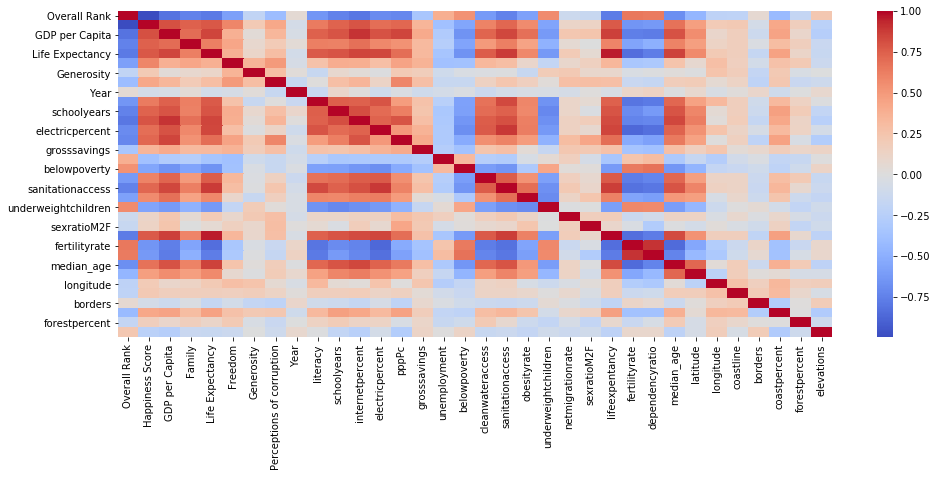

In [26]:
#Heatmap of correlations
heat= merge_df.corr();
plt.figure(figsize=(16, 6))
sns.heatmap(heat, cmap='coolwarm')

In [27]:
merge_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 35 to 22
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    152 non-null    object 
 1   Overall Rank               152 non-null    float64
 2   Happiness Score            152 non-null    float64
 3   GDP per Capita             152 non-null    float64
 4   Family                     152 non-null    float64
 5   Life Expectancy            152 non-null    float64
 6   Freedom                    152 non-null    float64
 7   Generosity                 152 non-null    float64
 8   Perceptions of corruption  152 non-null    float64
 9   Year                       152 non-null    float64
 10  literacy                   127 non-null    float64
 11  schoolyears                133 non-null    float64
 12  internetpercent            150 non-null    float64
 13  electricpercent            151 non-null    float64

In [42]:
#Delete column underweightchildren, and remove rows with NaN values in order to plot correlations.
del merge_df["underweightchildren"]
clean_df.dropna(how='any', inplace=True)
clean_df.info()

KeyError: 'underweightchildren'

In [ ]:
#new heatmap
heat= clean_df.corr();
plt.figure(figsize=(16, 6))
sns.heatmap(heat, cmap='coolwarm')

In [ ]:
#calculate correlation between Happiness and other variables. Sort by ascending value.
correlation_df = pd.DataFrame(clean_df.corr().reset_index())
correlation_df = correlation_df[['index', 'Happiness Score']]
correlation_df = correlation_df.sort_values(by='Happiness Score', ascending = True)
correlation_df

In [ ]:
#Grab columns to plot against Happiness Score
clean_df.columns


In [ ]:
columns = ['literacy', 'schoolyears',
       'internetpercent', 'electricpercent', 'pppPc',
       'grosssavings', 'unemployment', 'belowpoverty', 'cleanwateraccess',
       'sanitationaccess', 'obesityrate', 'netmigrationrate', 'sexratioM2F',
       'lifeexpentancy', 'fertilityrate', 'dependencyratio', 'median_age',
       'latitude', 'longitude','coastline', 'borders',
       'coastpercent', 'forestpercent', 'elevations']

C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


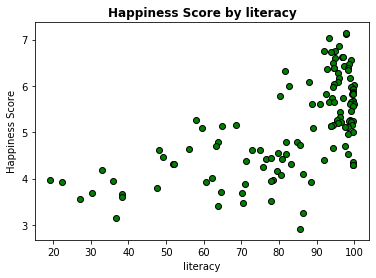

Regression Line:  y = x * nan + nan
R^2: nan


C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


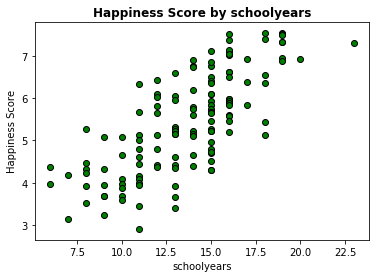

Regression Line:  y = x * nan + nan
R^2: nan


C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


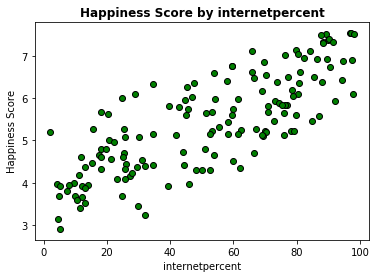

Regression Line:  y = x * nan + nan
R^2: nan


C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


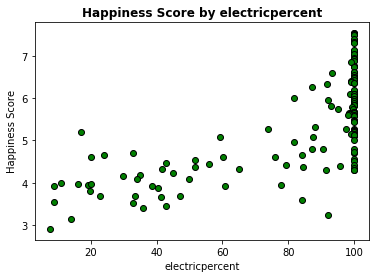

Regression Line:  y = x * nan + nan
R^2: nan


C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


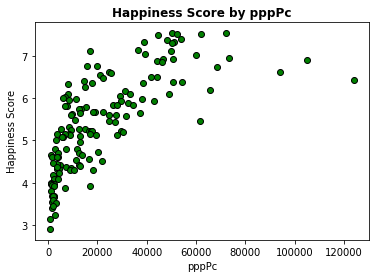

Regression Line:  y = x * nan + nan
R^2: nan


C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


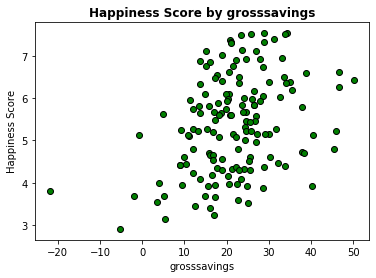

Regression Line:  y = x * nan + nan
R^2: nan


C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


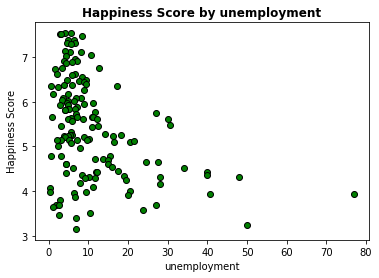

Regression Line:  y = x * nan + nan
R^2: nan


C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


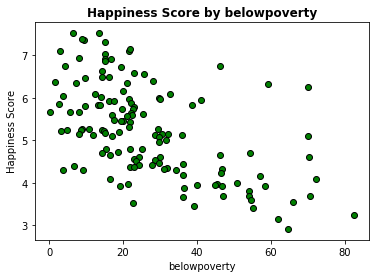

Regression Line:  y = x * nan + nan
R^2: nan


C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


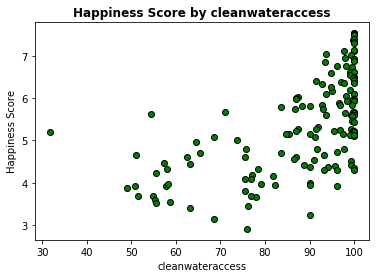

Regression Line:  y = x * nan + nan
R^2: nan


C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


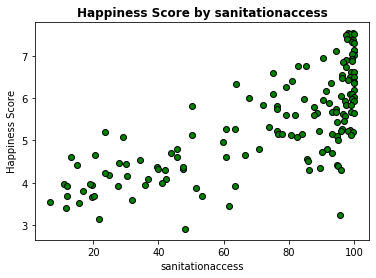

Regression Line:  y = x * nan + nan
R^2: nan


C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


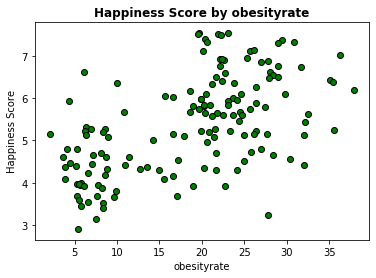

Regression Line:  y = x * nan + nan
R^2: nan


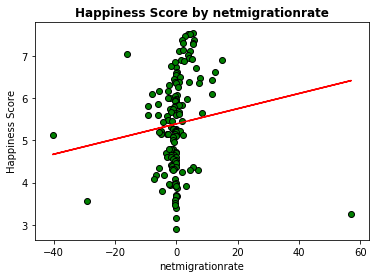

Regression Line:  y = x * 0.018003552137936793 + 5.392864679251692
R^2: 0.01327366725623056


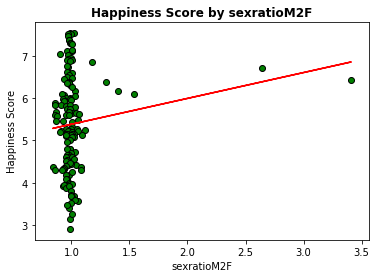

Regression Line:  y = x * 0.6123816869826637 + 4.77029524431992
R^2: 0.01798605976701272


C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


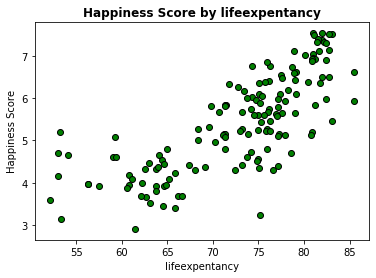

Regression Line:  y = x * nan + nan
R^2: nan


C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


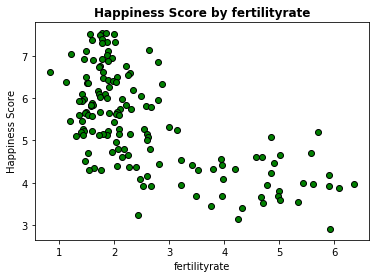

Regression Line:  y = x * nan + nan
R^2: nan


C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


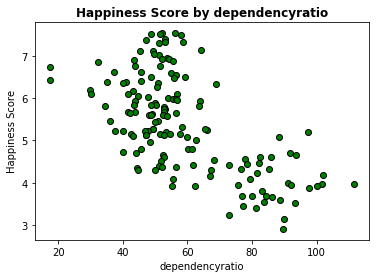

Regression Line:  y = x * nan + nan
R^2: nan


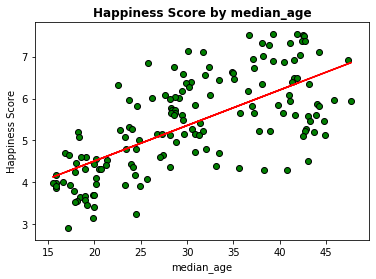

Regression Line:  y = x * 0.08480117252448065 + 2.813364611388494
R^2: 0.45861707011640573


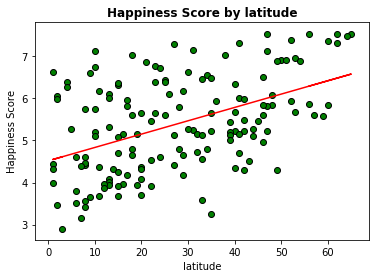

Regression Line:  y = x * 0.03170747219029036 + 4.514443236546592
R^2: 0.22155800480013893


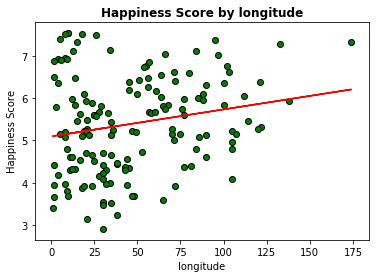

Regression Line:  y = x * 0.006370076421565427 + 5.095990990313243
R^2: 0.03982259410644996


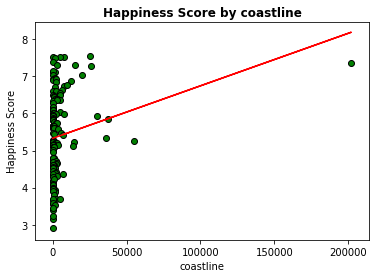

Regression Line:  y = x * 1.4136255999471365e-05 + 5.329308059140233
R^2: 0.048537651371984465


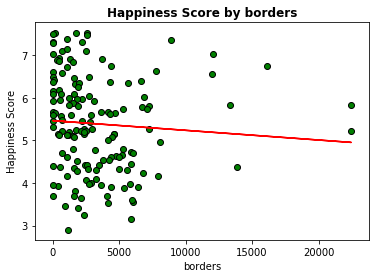

Regression Line:  y = x * -2.278143697506213e-05 + 5.466810600589444
R^2: 0.005365072767184373


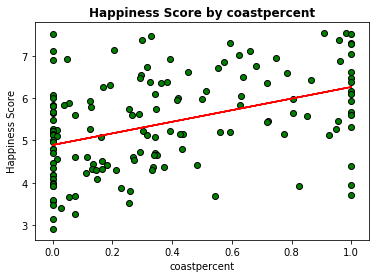

Regression Line:  y = x * 1.3705880300717395 + 4.893248572118864
R^2: 0.17951553340436005


C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


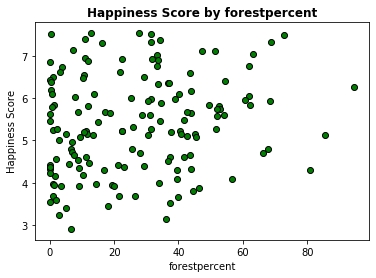

Regression Line:  y = x * nan + nan
R^2: nan


C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\David Obembe\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


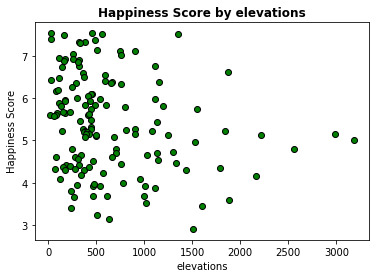

Regression Line:  y = x * nan + nan
R^2: nan


In [29]:
#loop through columns and make scatter plots with regression lines
for column in columns:
    y= merge_df['Happiness Score']
    x= merge_df[f'{column}']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.plot(x,regress_values,"r-")
    plt.scatter(x,y, facecolors="green", edgecolors="black")
    plt.xlabel(f'{column}')
    plt.ylabel("Happiness Score")
    plt.title(f"Happiness Score by {column}", fontweight='bold')
    plt.show()
    print(f"Regression Line:  y = x * {slope} + {intercept}")
    print(f"R^2: {rvalue ** 2}")

In [188]:
def regressionplot(y, x):
    
    colors = (0,0,0)
  
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.plot(x,regress_values,"r-")
    #plt.scatter(x, y, c=colors, alpha=0.5)
    plt.scatter(x,y, facecolors="black", edgecolors="black")
    
    #plt.xlabel(f'{column}')
    
    #plt.title(f"Happiness Score by {column}", fontweight='bold')
    #plt.show()
    print(f"Regression Line:  y = x * {slope} + {intercept}")
    print(f"R^2: {rvalue ** 2}")

Regression Line:  y = x * 0.029357283598821508 + 2.6027094395107984
R^2: 0.37719257897151093


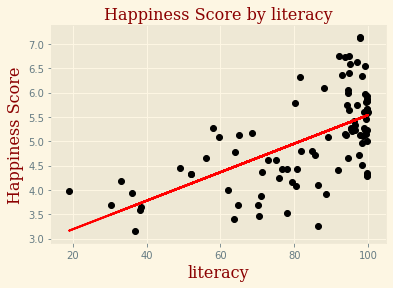

Regression Line:  y = x * 0.21120491288371082 + 2.3430150342900737
R^2: 0.3873738663678704


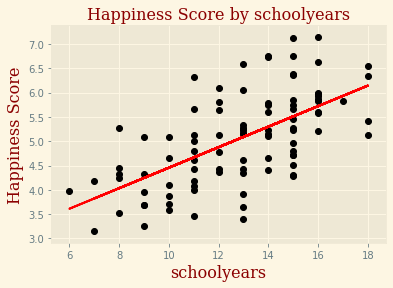

Regression Line:  y = x * 0.027435757244903537 + 3.8213895310013317
R^2: 0.4830955367185815


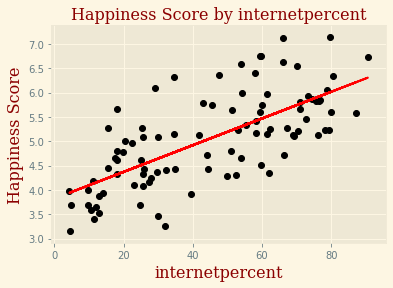

Regression Line:  y = x * 0.023978145564677558 + 3.1019518374812343
R^2: 0.48565788397513576


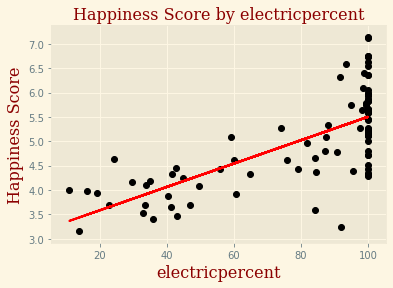

Regression Line:  y = x * 5.465506975996548e-05 + 4.298102904029182
R^2: 0.4557889204435846


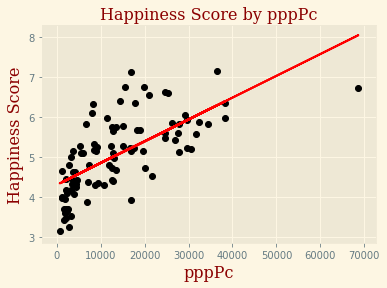

Regression Line:  y = x * 0.02141043848858902 + 4.599132003607984
R^2: 0.04289794901657568


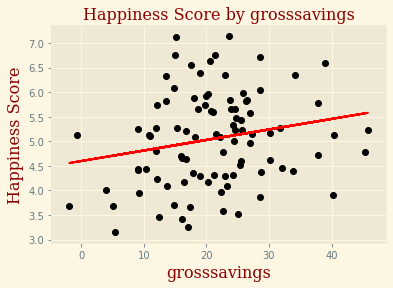

Regression Line:  y = x * -0.025354222005852287 + 5.335339650090629
R^2: 0.0964937526504814


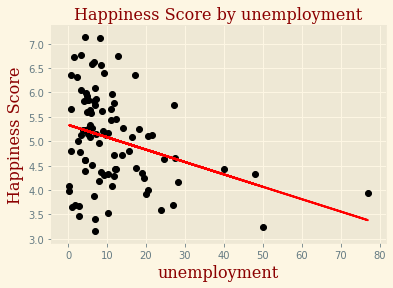

Regression Line:  y = x * -0.027173043220574445 + 5.7939251681150195
R^2: 0.2392204288734774


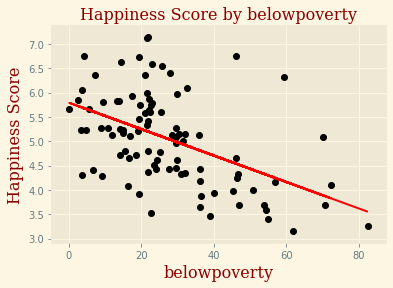

Regression Line:  y = x * 0.03809873492432558 + 1.747646195210737
R^2: 0.35113985986079854


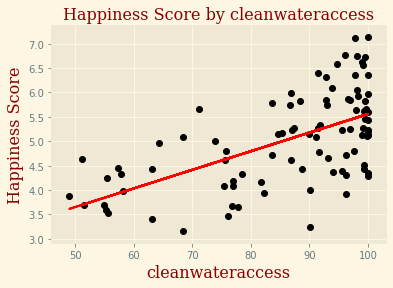

Regression Line:  y = x * 0.02189641821837801 + 3.5184784032926593
R^2: 0.433781649325783


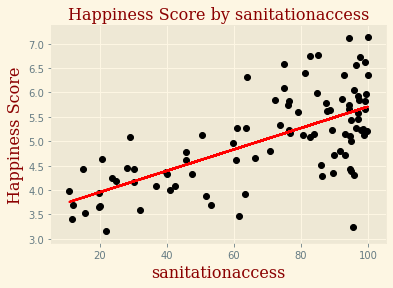

Regression Line:  y = x * 0.059542246335849 + 4.011153355960398
R^2: 0.30155399135900884


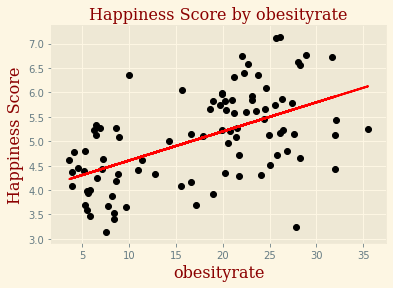

Regression Line:  y = x * -0.01625709746056181 + 5.039500080419073
R^2: 0.01734534840135919


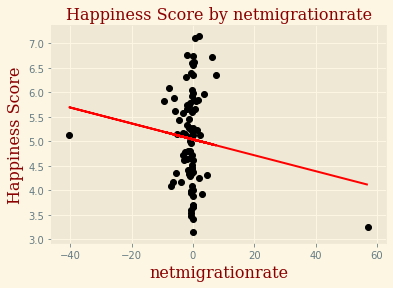

Regression Line:  y = x * 0.8047225551384085 + 4.2516667194486555
R^2: 0.022853902398491388


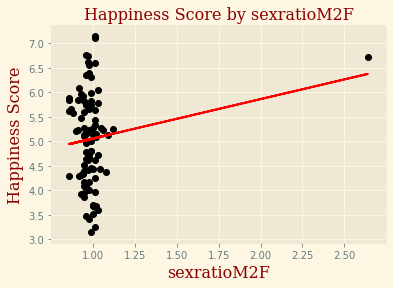

Regression Line:  y = x * 0.09085341662628085 + -1.4048172920705317
R^2: 0.485205860116502


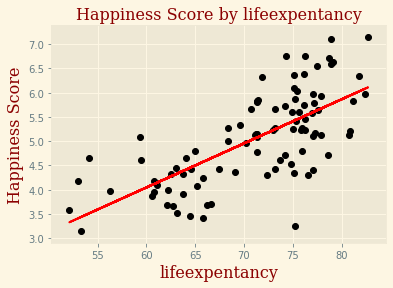

Regression Line:  y = x * -0.447672533600549 + 6.2479586712410695
R^2: 0.36458052363407983


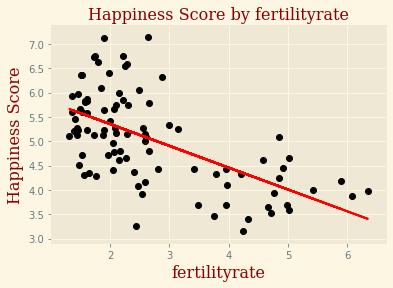

Regression Line:  y = x * -0.034326671416843306 + 7.119723235792972
R^2: 0.40914350061751564


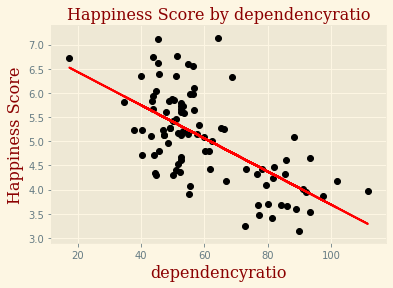

Regression Line:  y = x * 0.05990099609360027 + 3.3064711397784388
R^2: 0.3019603408773255


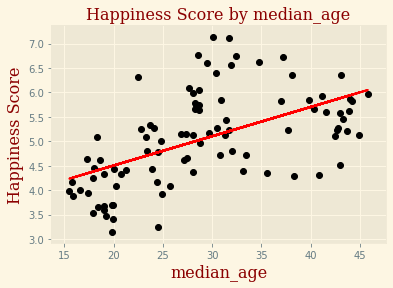

Regression Line:  y = x * 0.014297630910325184 + 4.674028688777486
R^2: 0.05643895445765728


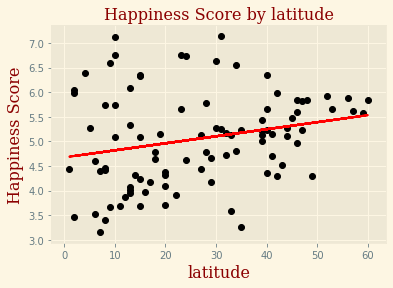

Regression Line:  y = x * 0.009729621100699823 + 4.599814499741399
R^2: 0.11516445500091828


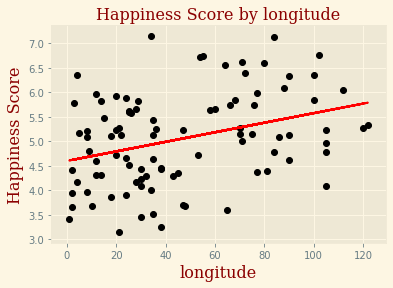

Regression Line:  y = x * 2.1043311138408056e-05 + 4.986042814407151
R^2: 0.030854029161987432


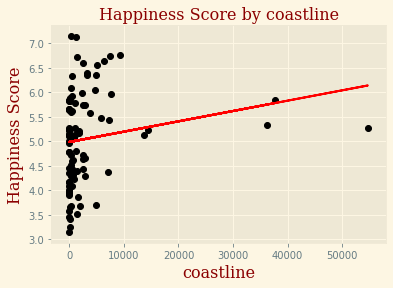

Regression Line:  y = x * 2.2938396659198424e-05 + 4.957792905188202
R^2: 0.00952934353252367


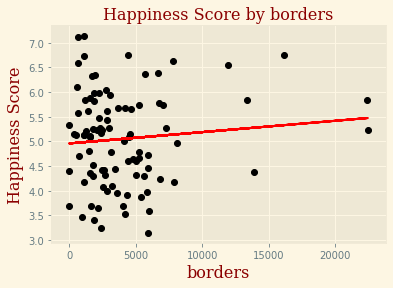

Regression Line:  y = x * 1.0420636843981983 + 4.766480843534007
R^2: 0.103048422096596


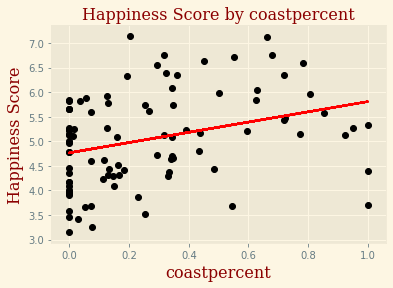

Regression Line:  y = x * 0.012122304294669603 + 4.726405359347624
R^2: 0.0618001837522603


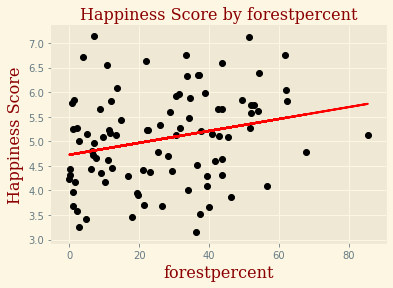

Regression Line:  y = x * -0.00016117276291333074 + 5.16877793276402
R^2: 0.011855707272000643


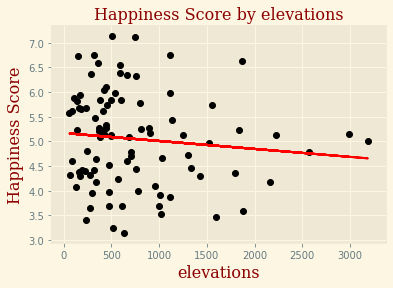

In [189]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fontweight='bold'

for column in columns:
    with plt.style.context('Solarize_Light2'):
        y= scatterg_merge_df['Happiness Score']
        x= scatterg_merge_df[f'{column}']
        regressionplot(y, x)
        plt.ylabel("Happiness Score", fontdict= font)
        plt.xlabel(f'{column}',fontdict= font)
        plt.title(f"Happiness Score by {column}", fontdict= font )
        
        #plt.show()
        plt.savefig(f'figure_{column}.JPEG')
        #plt.savefig(f'Images/{column}.png')
        plt.show()
        plt.close()
       

In [79]:
#Multi variable regression for modeling
from sklearn import linear_model
import statsmodels.api as sm

In [93]:
x_model= scatterg_merge_df[[
       'electricpercent', 'pppPc',
       'grosssavings', 'unemployment', 'cleanwateraccess',
       'sexratioM2F',
       'dependencyratio', 'median_age',
       'forestpercent']]
y= scatterg_merge_df[['Happiness Score']]


In [94]:
x_model= sm.add_constant(x_model)
model = sm.OLS(y, x_model).fit()
predictions = model.predict(x_model)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     18.97
Date:                Sat, 09 May 2020   Prob (F-statistic):           7.35e-17
Time:                        14:04:40   Log-Likelihood:                -75.847
No. Observations:                  94   AIC:                             171.7
Df Residuals:                      84   BIC:                             197.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.4467      1.414      4.559      0.000       3.634       9.259
electricpercent      0.0159      0.004      3.564      0.001       0.007       0.025
pppPc             5.735e-05   1.03e-05      5.576      0.000    3.69e-05    7.78e-05
grosssavings        -0.0095      0.007     -1.320      0.190      -0.024       0.005
unemployment        -0.0078      0.006     -1.375      0.173      -0.019       0.003
cleanwateraccess     0.0026      0.007      0.370      0.712      -0.011       0.016
sexratioM2F         -1.0254      0.485     -2.116      0.037      -1.989      -0.062
dependencyratio     -0.0124      0.008     -1.516      0.133      -0.029       0.004
median_age          -0.0625      0.017     -3.752      0.000      -0.096      -0.029
forestpercent        0.0063      0.003      1.897      0.061      -0.000       0.013
==============================================================================
Omnibus:                        3.607   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.272
Skew:                           0.166   Prob(JB):                        0.321
Kurtosis:                       2.314   Cond. No.                     4.45e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
sns.heatmap(x.corr())

TypeError: corr() missing 1 required positional argument: 'other'

In [ ]:
Happy_df['Country'].unique()

In [ ]:
for column in x_model:
    y= merge_df['Happiness Score']
    x= merge_df[f'{column}']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.plot(x,regress_values,"r-")
    plt.scatter(x,y, facecolors="green", edgecolors="black")
    plt.xlabel(f'{column}')
    plt.ylabel("Happiness Score")
    plt.title(f"Happiness Score by {column}", fontweight='bold')
    plt.show()
    print(f"Regression Line:  y = x * {slope} + {intercept}")
    print(f"R^2: {rvalue ** 2}")

In [ ]:
merge_df2 = pd.merge(Happydfgb,Factbook_df, on='Country', how='outer')
merge_df2

In [ ]:
merge_df2['Unhappy'] = merge_df2['Happiness Score'].isnull()
merge_df2.head()

In [ ]:
merge_df2.tail(120)

In [ ]:
unhappy = merge_df2.loc[merge_df2['Unhappy'] == 'True']
unhappy

In [96]:
merge_df.governmenttype.unique()

array(['parliamentary constitutional monarchy',
       'unitary parliamentary republic',
       'federal republic (formally a confederation)',
       'parliamentary republic',
       'federal parliamentary democracy (Parliament of Canada) under a constitutional monarchy; a Commonwealth realm; federal and state authorities and responsibilities regulated in constitution',
       'parliamentary constitutional monarchy; part of the Kingdom of the Netherlands',
       'parliamentary democracy (New Zealand Parliament) under a constitutional monarchy; a Commonwealth realm',
       'federal parliamentary democracy\xa0under a constitutional monarchy; a Commonwealth realm',
       'federal parliamentary republic', 'presidential republic',
       'parliamentary democracy', 'constitutional federal republic',
       'republican form of government with separate executive, legislative, and judicial branches; unincorporated organized territory of the US with local self-government\nNote: reference Puer

In [152]:
merge_df.governmenttype= merge_df['governmenttype'].str.split(';').str[0].str.split('(').str[0]
merge_df

,Country,Overall Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Year,literacy,schoolyears,internetpercent,electricpercent,governmenttype,pppPc,grosssavings,unemployment,belowpoverty,cleanwateraccess,sanitationaccess,obesityrate,netmigrationrate,sexratioM2F,lifeexpentancy,fertilityrate,dependencyratio,median_age,latitude,longitude,NSHemi,EWHemi,coastline,borders,coastpercent,forestpercent,elevations
35,denmark,2.250000,7.532500,1.400161,1.416360,0.832561,0.634449,0.335595,0.434218,2016.500000,NaN,19.0,97.0,100.0,parliamentary constitutional monarchy,50100.0,28.8,5.7,13.4,100.0,99.6,19.7,4.3,0.99,81.00,1.78,56.0,41.9,56.0,10.0,N,E,7314.0,140.00,0.981218,12.90,34.0
100,norway,2.750000,7.537750,1.527226,1.393343,0.834667,0.646811,0.343488,0.344688,2016.500000,NaN,18.0,97.3,100.0,parliamentary constitutional monarchy,72100.0,34.3,4.2,NaN,100.0,98.1,23.1,5.3,1.02,82.00,1.85,52.1,39.3,62.0,10.0,N,E,25148.0,2566.00,0.907411,27.80,460.0
56,iceland,3.000000,7.515250,1.388153,1.460016,0.890681,0.624793,0.435405,0.145682,2016.500000,NaN,19.0,98.2,100.0,unitary parliamentary republic,52200.0,25.8,2.8,NaN,100.0,98.8,21.9,3.7,1.00,83.10,1.99,51.6,36.7,65.0,18.0,N,W,4970.0,0.00,1.000000,0.30,557.0
129,switzerland,3.000000,7.519250,1.477205,1.390165,0.897398,0.632803,0.281040,0.388954,2016.500000,NaN,16.0,89.4,100.0,federal republic,62100.0,33.8,3.2,6.6,100.0,99.9,19.5,4.6,0.97,82.70,1.56,48.8,42.5,47.0,8.0,N,E,0.0,1770.00,0.000000,31.50,1350.0
43,finland,4.250000,7.480000,1.361200,1.396287,0.845794,0.627920,0.233978,0.399843,2016.500000,NaN,19.0,87.7,100.0,parliamentary republic,44500.0,23.3,8.5,NaN,100.0,97.6,22.2,2.8,0.97,81.10,1.75,57.9,42.6,64.0,26.0,N,E,1250.0,2563.00,0.327826,72.90,164.0
25,canada,6.250000,7.368750,1.393911,1.358015,0.865947,0.617693,0.415747,0.305308,2016.500000,NaN,16.0,89.8,100.0,federal parliamentary democracy,48400.0,20.8,6.3,9.4,99.8,99.8,29.4,5.7,0.98,82.00,1.60,47.3,42.4,60.0,95.0,N,W,202080.0,8893.00,0.957848,34.10,487.0
95,netherlands,6.500000,7.383750,1.414766,1.306557,0.848462,0.597814,0.438437,0.298768,2016.500000,NaN,18.0,90.4,100.0,parliamentary constitutional monarchy,53900.0,31.2,4.9,8.8,100.0,97.7,20.4,1.9,0.98,81.50,1.78,53.1,42.7,52.0,5.0,N,E,451.0,1053.00,0.299867,10.80,30.0
96,new zealand,8.250000,7.314500,1.321137,1.410411,0.858022,0.625978,0.458506,0.405019,2016.500000,NaN,19.0,88.5,100.0,parliamentary democracy,39000.0,21.0,4.7,NaN,100.0,NaN,30.8,2.2,0.99,81.40,2.01,52.9,38.1,41.0,174.0,S,E,15134.0,0.00,1.000000,31.40,388.0
128,sweden,9.000000,7.313250,1.408227,1.338968,0.871489,0.628476,0.353890,0.403627,2016.500000,NaN,19.0,91.5,100.0,parliamentary constitutional monarchy,51200.0,28.9,6.7,15.0,100.0,99.3,20.6,5.3,1.00,82.20,1.87,58.5,41.1,62.0,15.0,N,E,3218.0,2211.00,0.592743,68.70,320.0
6,australia,9.750000,7.288250,1.400606,1.374258,0.884162,0.617054,0.437097,0.320716,2016.500000,NaN,23.0,88.2,100.0,federal parliamentary democracy under a consti...,50400.0,21.0,5.6,NaN,100.0,100.0,29.0,5.4,1.01,82.40,1.77,51.1,38.8,27.0,133.0,S,E,25760.0,0.00,1.000000,16.20,330.0


In [163]:

government_median_df =merge_df.groupby(['governmenttype']).median().reset_index()

government_median_df=government_median_df[['governmenttype','Happiness Score','GDP per Capita',]]
government_median_df= government_median_df.sort_values(by=['Happiness Score'], ascending=False)

In [154]:
#government_median_df['text_new'] = government_median_df['governmenttype'].str.split(';').str[0].str.split('(').str[0]
#government_median_df
#edited_gov= government_median_df
#edited_gov= edited_gov.drop(['governmenttype'], axis=1)


In [155]:
#edited_gov2= edited_gov.groupby(['text_new']).sum().reset_index()
#edited_gov2

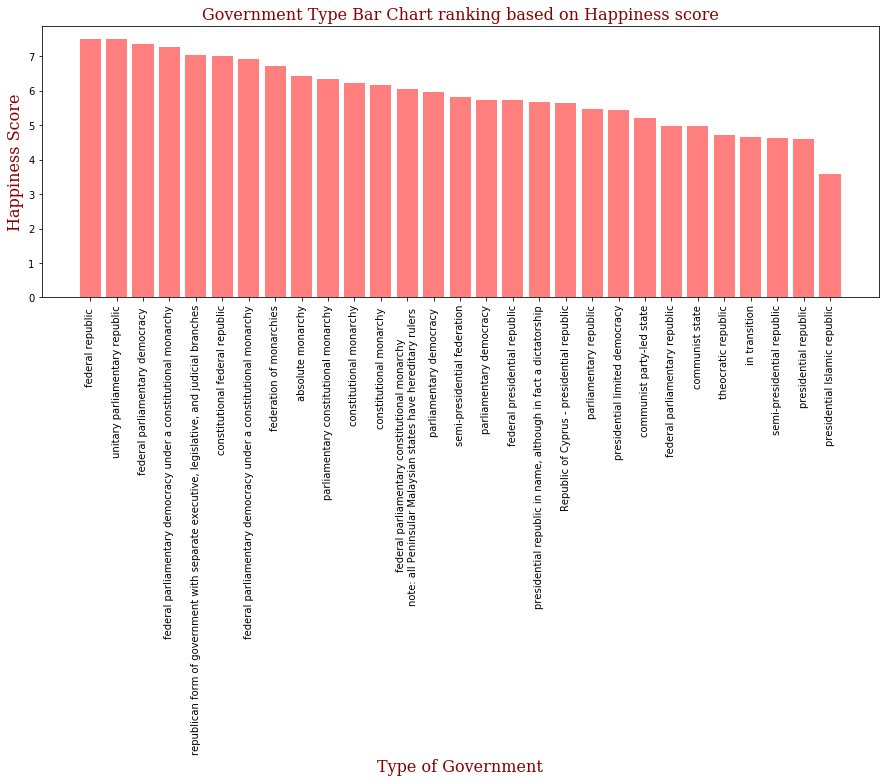

In [193]:
x_axis = government_median_df['governmenttype']
y_axis = government_median_df['Happiness Score']

plt.figure(figsize=(15,5))
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.xlabel("Type of Government", fontdict= font )
plt.ylabel("Happiness Score", fontdict= font )
plt.title("Government Type Bar Chart ranking based on Happiness score", fontdict= font )
plt.savefig(f'Government Type Bar Chart Ranking Based on Happiness score.JPEG')
